# 패스트캠퍼스 검색광고 데이터 분석
<br>

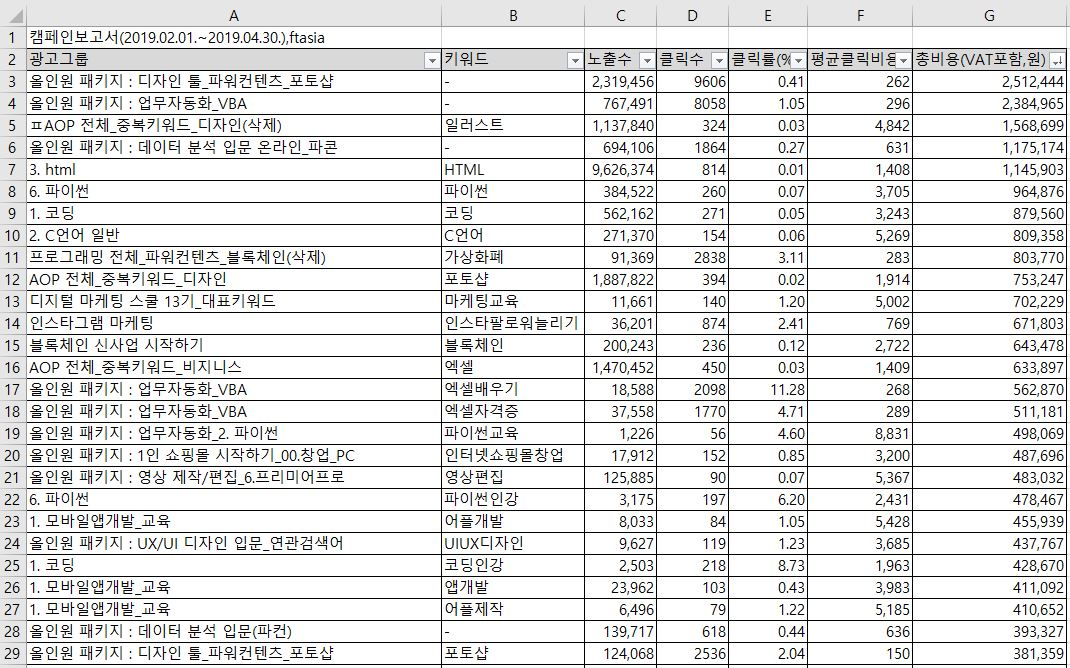

## 데이터의 구성 : 
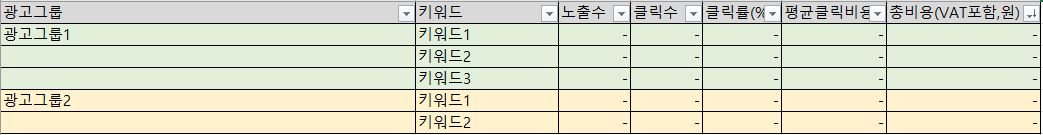

## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터분석

### 1. 데이터 전처리
- 학습목표 : 
 1. read_excel함수를 사용하여 파이썬에 데이터 불러오기 
 2. 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

### # read_excel함수를 사용하여 파이썬에 데이터 불러오기
- 파이썬의 디렉토리 경로구분자 : 슬래시(/)
- 운영체제별 디렉토리 경로구분자 
 1. Mac의 경우 : 슬래시(/)
 2. 윈도우의 경우 : 역슬래시(\ or ＼) 

In [4]:
# window의 경우 경로인식에러 발생
df=pd.read_excel('C:\Users\jungh\Desktop\데이터분석\패스트캠퍼스\네이버보고서.xls')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-4-93b3013561f1>, line 2)

In [5]:
# 방법1 : \\
df=pd.read_excel('..\\Data\\네이버보고서.xls')

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data\\네이버보고서.xls'

In [ ]:
# 방법2 : /
df=pd.read_excel('../Data/네이버보고서.xls')

In [ ]:
# 방법3 : r
df=pd.read_excel(r'../Data/네이버보고서.xls')

In [6]:
# Mac : 
df=pd.read_excel('../Data/네이버보고서.xls')

In [7]:
# head
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66358,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174


### # skiprows 함수 사용으로 불필요한 행 제거

In [8]:
# 첫 행 삭제
df=pd.read_excel('../Data/네이버보고서.xls',skiprows=[0])

In [9]:
# head
df.head()


,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


### # skiprows 사용 예제

In [12]:
# 원본데이터 가져오기
df=pd.read_excel('../Data/네이버보고서.xls')

In [13]:
# head
df

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66358,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
...,...,...,...,...,...,...,...
1377,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0,0,0,0
1378,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0,0,0,0
1379,마케팅KPI수립,LTV,32602,0,0,0,0
1380,data_camp_rmp_8,DECISION,60844,0,0,0,0


In [14]:
# 하나의 행 제거 
df=pd.read_excel('../Data/네이버보고서.xls',skiprows=[1])

In [15]:
# head
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [16]:
# 여러 행 제거
df=pd.read_excel('../Data/네이버보고서.xls',skiprows=[0,2,4])

In [17]:
# head
df

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
...,...,...,...,...,...,...,...
1374,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.000000,0.000000,0
1375,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.000000,0.000000,0
1376,마케팅KPI수립,LTV,32602,0.0,0.000000,0.000000,0
1377,data_camp_rmp_8,DECISION,60844,0.0,0.000000,0.000000,0


### (강의 진행을 위한 실습데이터 불러오기)

In [18]:
df=pd.read_excel('../Data/네이버보고서.xls',skiprows=[0])
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


### # 결측치 확인

In [19]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1376,False,False,False,False,False,False,False
1377,False,False,False,False,False,False,False
1378,False,False,False,False,False,False,False
1379,False,False,False,False,False,False,False


In [20]:
# 결측치 확인 - 열단위
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [21]:
# 결측치 확인 - 행단위
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1376    0
1377    0
1378    0
1379    0
1380    0
Length: 1381, dtype: int64

### # 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함,원)

In [22]:
df.head()


,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


- 클릭수 : 한 번의 클릭이 총 몇 번 이루어졌는지 나타내는 지표<br>
=> 반올림처리, 일의 자리수로 변경

In [23]:
# 클릭수 열에 round함수 적용
clk=round(df['클릭수'],0)

In [24]:
clk

0       9606.0
1       8058.0
2        324.0
3       1864.0
4        814.0
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 클릭수, Length: 1381, dtype: float64

### # round함수 활용예제
숫자 예시 : 9606.14574
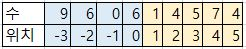

In [25]:
print(round(9606.14574,-3))
print(round(9606.14574,-2))
print(round(9606.14574,-1))
print(round(9606.14574,0))
print(round(9606.14574,1))
print(round(9606.14574,2))
print(round(9606.14574,3))
print(round(9606.14574,4))
print(round(9606.14574,5))

10000.0
9600.0
9610.0
9606.0
9606.1
9606.15
9606.146
9606.1457
9606.14574


In [27]:
# clk변수의 4번째 자료 확인
clk[4]

814.0

In [28]:
# clk변수의 5번째 자료 확인
clk[5]

260.0

In [29]:
# 소수점 제거 = 실수(float) => 정수(int)로 변경
clk.astype(int)

0       9606
1       8058
2        324
3       1864
4        814
        ... 
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int64

In [ ]:
# 기존 칼럼데이터 대체
df['클릭수']=clk.astype(int)

In [30]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


- 클릭률 : CTR = 클릭수 / 노출수 * 100<br>
=> 클릭수가 변경되어 기존 클릭률(%) 열 데이터 변경필요

In [31]:
# 데이터프레임의 열은 서로 수치연산 가능 
df['클릭수']/df['노출수']*100

0       0.414149
1       1.049915
2       0.028475
3       0.268489
4       0.008452
          ...   
1376    0.000000
1377    0.000000
1378    0.000000
1379    0.000000
1380    0.000000
Length: 1381, dtype: float64

In [32]:
#클릭률 칼럼 대체
df['클릭률(%)']=df['클릭수']/df['노출수']*100

In [33]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [34]:
# 수치연산 예제1
df['노출수']+df['클릭수']

0       2329062.0
1        775549.0
2       1138164.0
3        695969.6
4       9627187.6
          ...    
1376      24016.0
1377      32287.0
1378      32602.0
1379      60844.0
1380      61193.0
Length: 1381, dtype: float64

In [35]:
# head
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [36]:
# 수치연산 예제2
df['총비용(VAT포함,원)']/df['클릭률(%)']

0       6.066524e+06
1       2.271580e+06
2       5.509038e+07
3       4.376987e+06
4       1.355813e+08
            ...     
1376             NaN
1377             NaN
1378             NaN
1379             NaN
1380             NaN
Length: 1381, dtype: float64

- 평균클릭비용 : 칼럼명에 원 단위로 명시됨<br>
 => 반올림처리, 일의 자리수로 변경

In [ ]:
#head()


In [37]:
# cpc 변수 생성
cpc=round(df['평균클릭비용(VAT포함,원)'],0)
df['평균클릭비용(VAT포함,원)']=cpc.astype(int)

In [38]:
# head()
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,631,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408,1145903


### # 판다스를 활용한 데이터 탐색 실습
- 학습목표 : 
 1. 데이터 탐색과정에서 사용되는 함수를 살펴보고 실전 사례를 통해 사용법을 익힌다.

In [39]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [40]:
df=pd.read_excel('../Data/네이버보고서.xls',skiprows=[0])

In [41]:
#head() - 데이터의 첫 부분 출력, default : 첫 5행
#데이터의 구성,칼럼명 등 대략적인 데이터 파악
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [42]:
#head() - 첫 10행
df.head(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
7,2. C언어 일반,C언어,271370,153.6,0.056602,5269.257812,809358
8,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838.0,3.106086,283.217054,803770
9,AOP 전체_중복키워드_디자인,포토샵,1887822,393.6,0.020849,1913.737297,753247


In [43]:
#tail() - 데이터의 끝 부분 출력, default : 끝 5행
df.tail(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1371,7. 운영체제,가상머신,16605,0.0,0.0,0.0,0
1372,파이낸스 전체,부동산책,16722,0.0,0.0,0.0,0
1373,ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제),VD,17504,0.0,0.0,0.0,0
1374,AOP 전체_중복키워드_디자인,포토샵단축키,18818,0.0,0.0,0.0,0
1375,올인원 패키지 : 업무자동화_3. 엑셀,SUMIF,23549,0.0,0.0,0.0,0
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.0,0.0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.0,0.0,0
1378,마케팅KPI수립,LTV,32602,0.0,0.0,0.0,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.0,0.0,0
1380,4. 웹의 동작,REST,61193,0.0,0.0,0.0,0


In [44]:
#tail() - 끝 10행


(1381, 7)

In [45]:
#shape - dataframe의 크기(행, 열의 수)
df.shape

(1381, 7)

In [46]:
#describe() - 각 열에 대한 기술통계량
#데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
#지수 표기법(Exponential Notation, 10**n)
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352871,981.631682,3.791958e+04
std,2.964650e+05,387.502772,1.000468,1372.390031,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.007152,64.166667,7.700000e+01
50%,3.805000e+03,3.600000,0.061031,395.976793,2.123000e+03
75%,1.073400e+04,14.400000,0.237026,1302.812500,1.743500e+04
max,9.626374e+06,9606.000000,13.587402,9362.527778,2.512444e+06


In [47]:
#pandas출력 옵션설정 - float형식으로 수치표기  
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로

In [48]:
#describe()
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [49]:
#columns - 칼럼명 반환
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [53]:
#unique() - 열(시리즈)의 고유값
#df['광고그룹']
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [54]:
#len, unique()
#df['광고그룹']
len(df['광고그룹'].unique())

186

In [55]:
#unique()
#df['키워드']
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [56]:
#len, unique()
#df['키워드']
len(df['키워드'].unique())

1112

In [57]:
#value_counts() - 열의 고유값 빈도
#df['광고그룹']
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀           93
AOP 전체_중복키워드_디자인                57
#000_마케팅 전체_main                48
ㅍAOP 전체_중복키워드_디자인(삭제)           46
리눅스 인프라                         26
                                ..
올인원 패키지 : 영상 제작/편집_10.패캠강의       1
올인원 패키지 : 디지털 마케팅_2. 페이스북 광고     1
올인원 패키지 : 금융공학/퀀트_00.일반          1
올인원 패키지 : 게임 개발                  1
fin_camp_business_4              1
Name: 광고그룹, Length: 186, dtype: int64

In [58]:
#value_counts()
#df['키워드']
df['키워드'].value_counts()

-           8
GUI         5
구글광고        5
포토샵         5
서비스기획       4
           ..
쇼핑몰재고관리     1
마케팅종류       1
모바일개발       1
컴활1급실기인강    1
REST        1
Name: 키워드, Length: 1112, dtype: int64

In [59]:
#sort_values() - 정렬(default : 오름차순)
#노출수 기준 정렬
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [60]:
#sort_values(ascending=False) - 내림차순 정렬
#노출수 기준 정렬
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

In [ ]:
#sort_values - 정렬(default : 오름차순)
#클릭수 기준 정렬


In [ ]:
#sort_values(ascending=False) 정렬(내림차순)
#클릭수


# 시각화를 통한 데이터 탐색 실습

- 학습목표 : 
 1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
 2. 데이터를 가공,처리하여 시각화를 진행한다.

- chapter1 - 03. 시각화 라이브러리 matplotlib  
- 시리즈 시각화

In [61]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [62]:
import matplotlib.pyplot as plt

In [63]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [64]:
#노출수 칼럼 시각화
#데이터프레임 시각화 <-> 시리즈 시각화
#type함수
type(df['노출수'])

pandas.core.series.Series

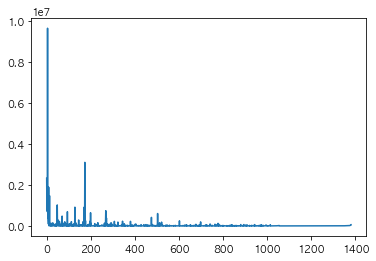

In [65]:
#plotting
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [66]:
#보충예제 - chapter 1 - 03. 시각화 라이브러리 matplotlib 
dict_data={"철수":[1,2,3,4],"영희":[2,3,4,5],"민수":[3,4,5,6],"수진":[4,5,6,7]}
data=DataFrame(dict_data)
#철수 칼럼(데이터프레임의 열 = 시리즈 자료구조) 출력
data['철수']

0    1
1    2
2    3
3    4
Name: 철수, dtype: int64

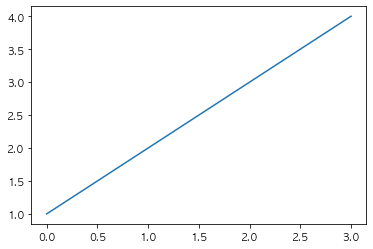

In [67]:
#plotting
#시리즈의 index가 x축, value가 y축
data['철수'].plot()
plt.show()

In [12]:
#시리즈의 index가 x축, value가 y축
df['노출수'].head()

0    2319456
1     767491
2    1137840
3     694106
4    9626374
Name: 노출수, dtype: int64

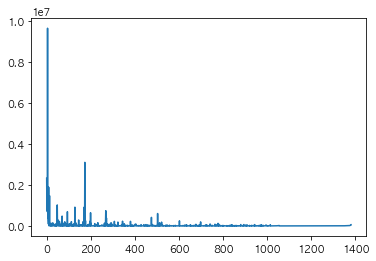

In [68]:
#plotting
df['노출수'].plot()
plt.show()

- 패턴이 명확하게 드러나도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [83]:
#2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
#노출수 칼럼, sort_values()
imp_sort=df['노출수'].sort_values()

In [84]:
#imp_sort 변수 출력
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [89]:
#reset_index() - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
imp_sort=imp_sort.reset_index()

In [90]:
#imp_sort 변수 출력
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [91]:
#drop('삭제할 인덱스명', axis=1) - 삭제(열 기준)
imp_sort.drop('index',axis=1)

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


In [92]:
#imp_sort 변수 출력
imp_sort
#해당 변수의 index 칼럼 미삭제

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [93]:
#inplace=True
imp_sort.drop('index',axis=1,inplace=True)

In [94]:
#imp_sort 변수 출력, 
#기존 변수의 index칼럼 삭제 확인
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


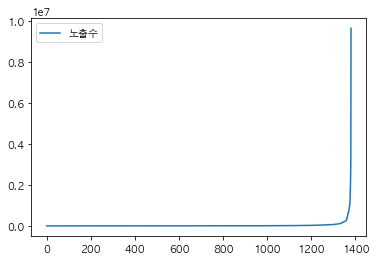

In [95]:
#imp_sort plotting
imp_sort.plot()
plt.show()

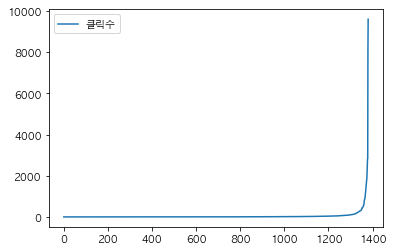

In [80]:
#클릭수칼럼 시각화 
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

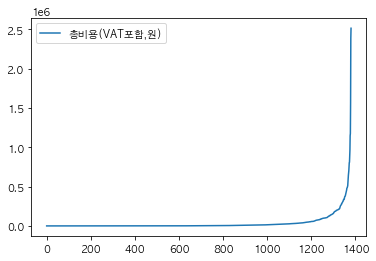

In [81]:
#총비용칼럼 시각화
#위 코드에서 칼럼명만 변경
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

# 데이터 분석
- 학습목표 : 
 1. 파이썬과 판다스를 사용하여 데이터를 처리, 분석할 수 있다.

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [96]:
#노출수 칼럼 imp변수에 할당
imp=df['노출수']

In [97]:
#1. 95백분위수 찾기
#quantile - 분위수 출력(default : 2사분위수(중앙값))
imp.quantile()

3805.0

In [98]:
#median - 중앙값
imp.median()

3805.0

In [99]:
#quantile(0) - 최소값
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [100]:
#quantile(1) - 최대값
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [102]:
#95백분위수 = quantile(0.95)
imp.quantile(0.95)

82858.0

In [103]:
#2. 95백분위수 이상(상위 5%)의 노출수 추출
#series[condition]
imp=imp[imp>=imp.quantile(0.95)]

In [104]:
#imp 출력
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

3. 상위 5%에 해당하는 키워드 추출<br>
 -기존 상위 노출수 추출과정
   1. as-is : 데이터프레임의 기본숫자인덱스 
   2. to-be : 데이터프레임의 인덱스를 '키워드'로 재설정

In [105]:
#실습예제 원본
#head()
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


In [106]:
#데이터프레임의 인덱스를 키워드로 변경
#set_index('키워드')
df_index=df.set_index('키워드')

In [107]:
#df_index 
df_index 

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0.00,0.00,0.00,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0.00,0.00,0.00,0
LTV,마케팅KPI수립,32602,0.00,0.00,0.00,0


In [108]:
#df_index에서 imp변수 생성 및 quantile(0.95)
imp=df_index['노출수']

In [109]:
#imp 노출수 상위 5% 키워드 추출
imp=imp[imp>=imp.quantile(0.95)]

In [110]:
#imp 변수 출력
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [111]:
#df_index에서 클릭수 상위 5% 키워드 추출
clk=df_index['클릭수']
clk=clk[clk>=clk.quantile(0.95)]

In [112]:
#clk 변수 출력, 클릭수 상위 5% 키워드 출력
clk

키워드
-         9606.00
-         8058.00
일러스트       324.00
-         1863.60
HTML       813.60
            ...  
재태크        126.00
모스자격증      198.00
펀드하는법      248.40
채권투자       135.60
주식투자하는법    120.00
Name: 클릭수, Length: 70, dtype: float64

### # 중점관리키워드 선별
 - 노출수와 클릭수 모두 95백분위수 이상
 
### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [113]:
#df_index에서 imp, clk 변수 생성
imp=df_index['노출수']
clk=df_index['클릭수']

In [114]:
#노출수와 클릭수 모두 상위5%(95백분위수 이상) 추출
result=df_index[(imp>=imp.quantile(0.95))&clk>=clk.quantile(0.95)]

In [115]:
#result변수 출력
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,


In [124]:
#index - 중점관리키워드 출력
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

### # 저효율키워드 선별

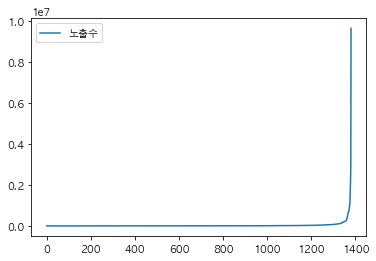

In [102]:
#노출수 선그래프
imp_sort.plot()
plt.show()

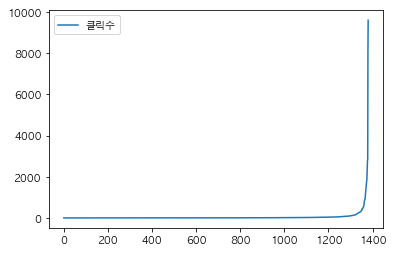

In [103]:
#클릭수 선그래프
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

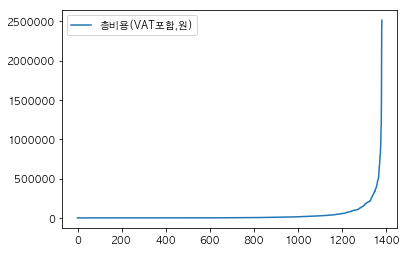

In [104]:
#총비용 선그래프
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 85백분위수 이상
 4. 총비용 95백분위수 미만
 
 ### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [118]:
#df_index로 cost 변수 생성
cost=df_index['총비용(VAT포함,원)']

In [122]:
# 데이터프레임[(조건문)&(조건문)]
result=df_index[(imp<imp.quantile(0.95))&(clk<clk.quantile(0.95))&(cost>=cost.quantile(0.85))&(cost<cost.quantile(0.95))]

In [123]:
#index - 저효율키워드 출력
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

# 광고그룹 분석
- 학습목표 : 
 1. groupby함수 사용실습
 2. 키워드 분석과정에서 진행한 코딩 복습

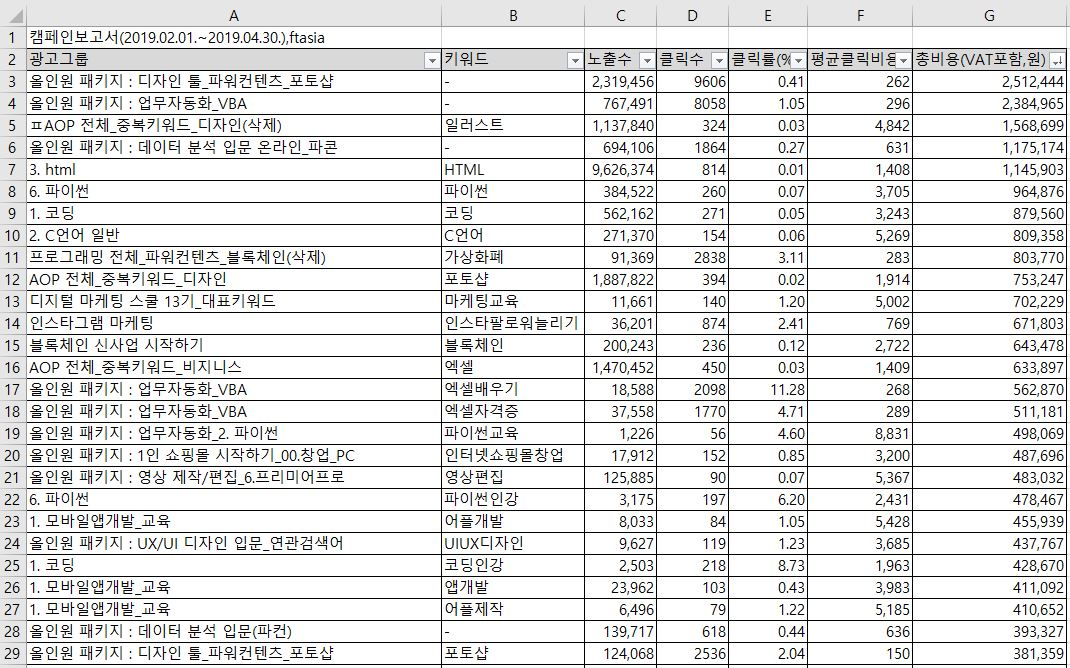

### as-is : 키워드  기준 분석
- 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
- 데이터의 구성을 광고그룹 기준으로 변경해야함
- 광고그룹의 노출수/클릭수/총비용...
- groupby 함수 사용

In [125]:
#groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped=df.groupby('광고그룹')

In [127]:
#해당변수 출력시 객체정보만 출력됨
grouped
#데이터를 살펴보기 위하여는 집계함수 사용해야 함

In [128]:
#count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [129]:
#mean -각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.40,0.18,625.09,7243.96
001.BASIC DESIGN,5738.56,6.80,0.23,298.69,2427.33
001.데이터분석/ 통계,3715.00,20.28,0.89,1021.47,19575.60
002.R,13413.78,8.53,0.11,360.04,4796.00
002.UX/UI,3090.80,4.08,0.09,69.93,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.71,0.05,648.33,15781.62
프로그래밍 유치원,5921.62,7.80,0.22,2032.33,23617.00
프로그래밍 전체,90375.00,9.20,0.02,123.88,1626.17


In [130]:
#median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,3.60,0.06,765.97,2458.50
001.BASIC DESIGN,5524.00,2.40,0.04,357.50,1023.00
001.데이터분석/ 통계,1813.00,13.80,0.57,1096.80,13464.00
002.R,5184.00,3.60,0.03,119.17,1287.00
002.UX/UI,2649.00,1.20,0.09,73.33,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,3.60,0.02,852.50,2706.00
프로그래밍 유치원,3748.00,3.00,0.12,1763.82,8002.50
프로그래밍 전체,3455.50,1.20,0.01,130.50,225.50


In [131]:
#std - 그룹 데이터의 표준편차
grouped.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.73,0.31,472.87,15854.71
001.BASIC DESIGN,4182.62,9.14,0.47,176.15,3220.04
001.데이터분석/ 통계,4109.84,18.32,0.82,269.59,19127.40
002.R,19333.63,14.71,0.17,371.70,10077.59
002.UX/UI,1996.65,7.18,0.11,69.11,1005.28
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.58,35.27,0.06,470.85,37543.64
프로그래밍 유치원,6642.34,9.77,0.25,1649.70,37088.92
프로그래밍 전체,200385.15,17.26,0.03,119.98,2801.70


In [132]:
#var - 그룹 데이터의 분산
grouped.var()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1891824593.19,314.41,0.10,223602.50,251371923.49
001.BASIC DESIGN,17494344.53,83.52,0.22,31027.33,10368671.50
001.데이터분석/ 통계,16890757.78,335.50,0.67,72677.81,365857245.60
002.R,373789206.44,216.52,0.03,138163.90,101557901.50
002.UX/UI,3986602.70,51.55,0.01,4775.52,1010592.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,35437152679.06,1243.79,0.00,221698.50,1409525055.09
프로그래밍 유치원,44120700.55,95.45,0.06,2721526.39,1375588223.43
프로그래밍 전체,40154209477.09,298.04,0.00,14394.51,7849530.33


# 광고그룹 기준 데이터 전처리

In [133]:
#그룹데이터의 합계(sum) - 노출수,클릭수,총비용 칼럼
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.26,205161
프로그래밍 유치원,47373,62.40,1.80,16258.61,188936
프로그래밍 전체,1084500,110.40,0.29,1486.58,19514


In [134]:
#df_group 변수 출력
df_group=grouped.sum()
df_group
# 클릭률, 평균클릭비용 칼럼 전처리 
# as-is : 키워드에 대한 클릭률의 총합(sum), 키워드에 대한 평균클릭비용의 총합(sum)
# to-be : 광고그룹에 대한 클릭률, 광고그룹에 대한 평균클릭비용

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.26,205161
프로그래밍 유치원,47373,62.40,1.80,16258.61,188936
프로그래밍 전체,1084500,110.40,0.29,1486.58,19514


In [135]:
#클릭률(ctr) = 클릭수 / 노출수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['클릭률(%)']=df_group['클릭수']/df_group['노출수']

In [136]:
#평균클릭비용(cpc) = 총비용 / 클릭수
#데이터전처리 - 데이터프레임의 열 단위 수치연산
df_group['평균클릭비용(VAT포함,원)']=df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [137]:
#클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 결측값이 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,NaN,0
fin_camp_business_4,2136,0.00,0.00,NaN,0
fin_camp_rfs_9,1928,0.00,0.00,NaN,0
다함께 DDD 프로젝트,3689,0.00,0.00,NaN,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,NaN,0


In [138]:
#fillna - 전달된 값으로 결측값을 대체하는 함수 
#평균클릭비용
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [139]:
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0.00,0
fin_camp_business_4,2136,0.00,0.00,0.00,0
fin_camp_rfs_9,1928,0.00,0.00,0.00,0
다함께 DDD 프로젝트,3689,0.00,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0.00,0


In [140]:
# 평균클릭비용 칼럼 반올림처리(round), 소수점 제거(astype(int)
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [141]:
#head()
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,0.00,862,347710
001.BASIC DESIGN,51647,61.20,0.00,357,21846
001.데이터분석/ 통계,37150,202.80,0.01,965,195756
002.R,120724,76.80,0.00,562,43164
002.UX/UI,15454,20.40,0.00,135,2750


# 데이터 시각화 

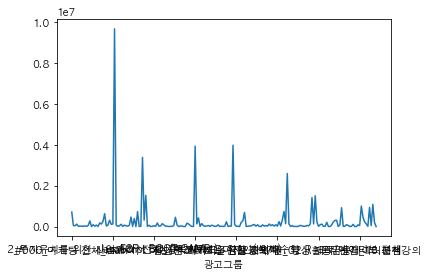

In [143]:
#노출수 칼럼 선그래프
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

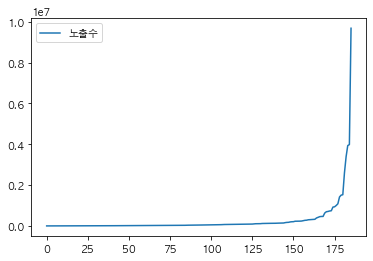

In [145]:
#노출수 칼럼 선그래프
#sort_values(),reset_index(),drop('index',axis=1),plot - 한줄 코딩(괄호사용)
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

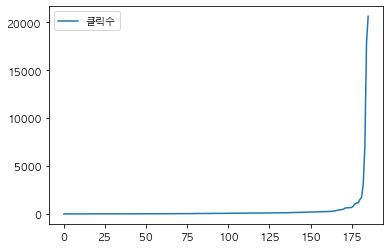

In [146]:
#클릭수 칼럼 선그래프
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

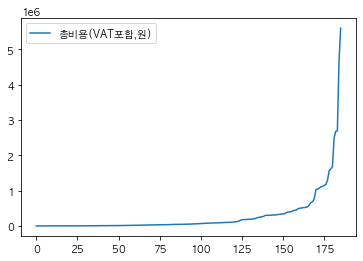

In [147]:
#총비용 칼럼 선그래프
(((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

### # 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
 1. 상위20%(노출수 80백분위수 이상)
 2. 상위10%(클릭수 90백분위수 이상)

In [153]:
#df_group에서 imp, clk 변수 생성
imp=df_group['노출수']
clk=df_group['클릭수']

In [154]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result=df_group[(imp>=imp.quantile(0.8))&{clk>=clk.quantile(0.9)}]

TypeError: unhashable type: 'Series'

In [ ]:
#index - 중점관리 광고그룹 출력


- 저효율 광고그룹 : 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
 1. 노출수 80백분위수 미만
 2. 클릭수 90백분위수 미만
 3. 총비용 60백분위수 이상
 4. 총비용 90백분위수 미만

In [150]:
#df_group에서 cost 변수 생성
cost=df_group['총비용(VAT포함,원)']

In [151]:
#조건이 여러개일 경우 
#데이터프레임[(조건문)&(조건문)]
result=df_group[(imp<imp.quantile(0.8))&(clk<clk.quantile(0.9))&(cost>=cost.quantile(0.6))&(cost<cost.quantile(0.9))]

In [152]:
#index - 저효율 광고그룹 출력
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')